In [30]:
import pandas as pd
%matplotlib inline

In [31]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)

In [32]:
df_wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# PCA

In [33]:
from  sklearn.cross_validation import train_test_split
from  sklearn.preprocessing import StandardScaler


In [34]:
X,y = df_wine.iloc[:,1:].values,df_wine.iloc[:,0].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [35]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals,eigen_vecs = np.linalg.eig(cov_mat)

In [36]:
eigen_vals

array([ 4.8923083 ,  2.46635032,  1.42809973,  1.01233462,  0.84906459,
        0.60181514,  0.52251546,  0.08414846,  0.33051429,  0.29595018,
        0.16831254,  0.21432212,  0.2399553 ])

In [37]:
t = sum(eigen_vals)
var_exp = list(map(lambda x: x/t, sorted(eigen_vals,reverse=True)))
cum_var_exp  = np.cumsum(var_exp)

<function matplotlib.pyplot.show>

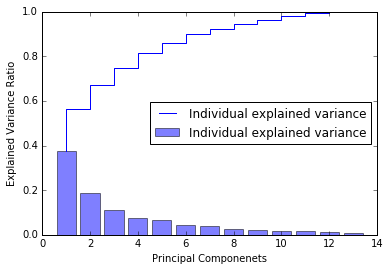

In [38]:
import matplotlib.pyplot as plt
plt.bar(range(1,14),var_exp,alpha=0.5,align='center',label = 'Individual explained variance')
plt.step(range(1,14),cum_var_exp,label = 'Individual explained variance')
plt.xlabel('Principal Componenets')
plt.ylabel('Explained Variance Ratio')
plt.legend(loc='best')
plt.show

In [39]:
eigen_pairs = [(np.abs(eigen_vals[i]),eigen_vecs[:,i]) for i in range(len(var_exp))]
eigen_pairs.sort(reverse=True)
   

In [41]:
W = np.hstack((eigen_pairs[0][1][:,np.newaxis],eigen_pairs[1][1][:,np.newaxis]))
X_train_pca = X_train_std.dot(W)


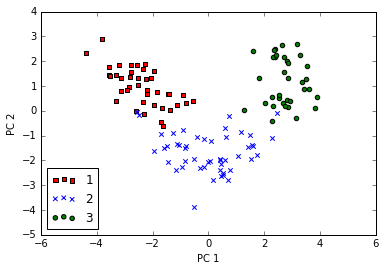

In [56]:
colours = ['r','b','g']
markers = ['s','x','o']
for l,c,m in zip(np.unique(y_train),colours,markers):
    plt.scatter(X_train_pca[y_train==l,0],X_train_pca[y_train==l,1],c=c,marker=m,label=l)
    
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

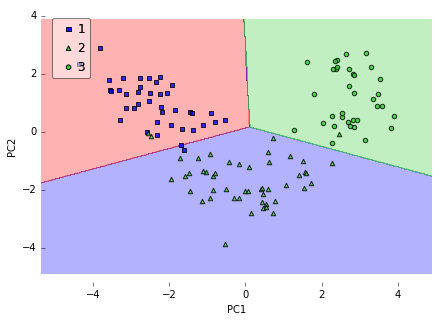

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from mlxtend.evaluate import plot_decision_regions
fig = plt.figure(figsize=(7, 5))

pca = PCA(n_components=2)
lr = LogisticRegression()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca,y_train)

fig = plot_decision_regions(X=X_train_pca, y=y_train,
                                clf=lr, legend=2)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()




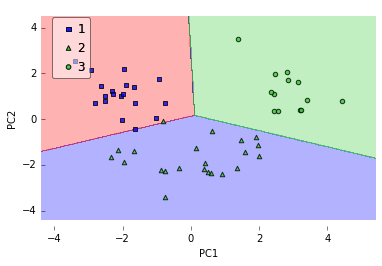

In [58]:
fig = plot_decision_regions(X=X_test_pca, y=y_test,
                                clf=lr, legend=2)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [64]:
lr.score(X_test_pca,y_test)


0.98148148148148151

In [70]:
pca= PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([ 0.37329648,  0.18818926,  0.10896791,  0.07724389,  0.06478595,
        0.04592014,  0.03986936,  0.02521914,  0.02258181,  0.01830924,
        0.01635336,  0.01284271,  0.00642076])

# LDA

In [74]:
np.mean(X_train_std,axis=0)

array([  2.89016123e-15,  -1.25560404e-15,   1.14514133e-15,
         2.56246637e-15,  -3.25904178e-16,  -1.35106979e-15,
         2.77555756e-16,  -1.63936964e-15,   1.08157211e-15,
        -3.93950106e-17,  -1.86230959e-16,   1.06903733e-15,
         2.28311993e-17])

In [101]:
mean_overall = np.mean(X_train_std,axis=0)
mean_vecs = []
for cl in np.unique(y_train):
    mean_vecs.append(np.mean(X_train_std[y_train==cl],axis=0))
d=13 

S_W = np.zeros((d,d))
for cl in np.unique(y_train):
    class_scatter = np.cov(X_train_std[y_train==cl].T)
    S_W += class_scatter
    

S_B = np.zeros((d,d))
for label,mean_vec in  zip(np.unique(y_train),mean_vecs):
    n = X[y==label].shape[0]
    mean_vec = mean_vec.reshape(d,1)
    mean_overall = mean_overall.reshape(d,1)   
    S_B += n*(mean_vec-mean_overall).dot((mean_vec-mean_overall).T)
    


(13, 13)

In [115]:
eigen_vals,eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
eigen_vals

array([  6.43015384e+02 +0.00000000e+00j,
        -3.55271368e-14 +0.00000000e+00j,
         2.25086982e+02 +0.00000000e+00j,
         6.15579961e-14 +0.00000000e+00j,
        -6.09154893e-14 +0.00000000e+00j,
         2.71387645e-14 +0.00000000e+00j,
         2.22424692e-14 +0.00000000e+00j,
        -1.98826551e-14 +1.11085754e-14j,
        -1.98826551e-14 -1.11085754e-14j,
         9.97654333e-16 +8.58389688e-15j,
         9.97654333e-16 -8.58389688e-15j,
        -4.98929647e-15 +0.00000000e+00j,   3.91532059e-15 +0.00000000e+00j])

In [125]:
eigen_pairs = [(np.abs(eigen_vals[i]),eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs,key= lambda k: k[0],reverse=True)

for val in eigen_pairs:
    print(val[0])

643.015384346
225.086981854
6.15579960812e-14
6.09154892925e-14
3.5527136788e-14
2.71387644836e-14
2.27754346089e-14
2.27754346089e-14
2.22424692302e-14
8.64167807188e-15
8.64167807188e-15
4.98929647176e-15
3.9153205942e-15
